# Import

In [63]:
import pandas as pd
import numpy as np
import pickle

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import euclidean_distances

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


Intuito aqui é relembrar pq as moléculas 2-2-Difluoropropane e 1-1-Dichloroethylene

In [31]:
%pwd

'/home/miguel-senra/Documents/Master-Degree-Research'

In [32]:
df_pol_raw = pd.read_csv("./data/raw/polar_molecules.CSV")
df_pol_processed = pd.read_csv("./data/processed/processed_polar.csv")

In [33]:
df_pol_raw

,Molecule,Formula,Expt,Dipole,Alpha,pi_bond,Ei,axx,ayy,azz,AlphaB,Molecule Type
0,Isobutane,C4H10,41.0,0.132,8.14,0.0,10.57,8.414,8.414,7.376,8.068000,0.0
1,Ciclopenteno,C5H8,70.0,0.200,8.90,1.0,9.00,10.346,9.116,7.182,8.881333,0.0
2,"2,2-difl.propano",C3H6F2,25.0,2.400,5.90,0.0,11.40,NaN,NaN,NaN,NaN,0.0
3,Dimetilcarbonato,C3H6O3,102.0,0.300,7.70,1.0,10.30,7.700,7.700,6.700,7.366667,0.0
4,Ciclohexano,C6H12,82.0,0.330,11.00,1.0,9.90,11.300,11.300,9.800,10.800000,0.0
5,Ciclohexeno,C6H10,105.0,0.330,10.70,1.0,9.00,12.187,10.737,8.658,10.527333,0.0
6,Tolueno,C6H5CH3,173.0,0.380,11.86,3.0,8.83,15.495,13.390,8.003,12.296000,0.0
7,Furan,C4H4O,52.0,0.660,7.23,2.0,8.88,8.747,7.998,5.194,7.313000,0.0
8,Phenylacetylene,C8H6,230.0,0.660,13.80,5.0,8.82,21.795,13.722,8.256,14.591000,0.0
9,Dimetoximethano,C3H8O2,78.0,0.700,7.70,0.0,9.70,8.616,7.299,6.726,7.547000,0.0


In [34]:
df_pol_processed

,Molecule,Formula,Expt,Dipole,Alpha,pi_bond,Ei
0,Isobutane,C4H10,41.0,0.132,8.14,0.0,10.57
1,Ciclopenteno,C5H8,70.0,0.200,8.90,1.0,9.00
2,"2,2-difl.propano",C3H6F2,25.0,2.400,5.90,0.0,11.40
3,Dimetilcarbonato,C3H6O3,102.0,0.300,7.70,1.0,10.30
4,Ciclohexano,C6H12,82.0,0.330,11.00,1.0,9.90
5,Ciclohexeno,C6H10,105.0,0.330,10.70,1.0,9.00
6,Tolueno,C6H5CH3,173.0,0.380,11.86,3.0,8.83
7,Furan,C4H4O,52.0,0.660,7.23,2.0,8.88
8,Phenylacetylene,C8H6,230.0,0.660,13.80,5.0,8.82
9,Dimetoximethano,C3H8O2,78.0,0.700,7.70,0.0,9.70


# Useful Functions

In [35]:
def create_df_predict_performances(models_list, models_names_list, X, y, df):
    dict_of_performances = {}
    dict_of_predicts = {}

    for i, j in enumerate(models_list):
        dict_of_performances[models_names_list[i]] = -cross_val_score(j, X, y, 
                    scoring="neg_mean_absolute_percentage_error", cv = len(X), n_jobs = 6)
        
        dict_of_predicts[models_names_list[i]] = cross_val_predict(j, X, y, cv = len(X), n_jobs = 6)

    df_performances = np.round(pd.DataFrame(dict_of_performances), 2)
    df_performances["erro medio"] = df_performances.mean(axis=1)
    df_performances = pd.concat([df[["Molecule", "Formula"]], df_performances, df["Expt"]], axis = 1)

    df_predicts = np.round(pd.DataFrame(dict_of_predicts)).astype(int)
    df_predicts = pd.concat([df[["Molecule", "Formula"]], df_predicts, df["Expt"]], axis = 1)

    return df_performances, df_predicts

def analisar_outliers(df, variavel):
    """
    Analisa e visualiza outliers para uma variável específica em um DataFrame.
    
    Args:
    df (pandas.DataFrame): O DataFrame contendo os dados.
    variavel (str): O nome da coluna a ser analisada.
    
    Returns:
    dict: Um dicionário contendo os outliers e estatísticas.
    """
    
    # Criar o boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[variavel])
    plt.title(f'Identificação de Outliers via Boxplot - {variavel}')
    plt.xlabel(variavel)

    # Calcular Q1, Q3 e IQR
    Q1 = df[variavel].quantile(0.25)
    Q3 = df[variavel].quantile(0.75)
    IQR = Q3 - Q1

    # Definir limites para outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar outliers
    outliers = df[(df[variavel] < lower_bound) | (df[variavel] > upper_bound)]

    # Adicionar texto com o número de outliers
    plt.text(0.95, 0.95, f'Outliers: {len(outliers)}', 
             transform=plt.gca().transAxes, ha='right', va='top')

    plt.show()

    # Imprimir informações sobre os outliers
    print(f"\nOutliers para {variavel}:")
    print(outliers[['Molecule', variavel]].sort_values(by=variavel))

    # Estatísticas descritivas
    print("\nEstatísticas descritivas:")
    print(df[variavel].describe())

    print(f"\nLimite inferior para outliers: {lower_bound}")
    print(f"Limite superior para outliers: {upper_bound}")
    
    # Retornar um dicionário com informações relevantes
    # return {
    #     'outliers': outliers,
    #     'lower_bound': lower_bound,
    #     'upper_bound': upper_bound,
    #     'statistics': df[variavel].describe()
    # }

def identificar_gaps_significativos(df, coluna, metodo='mediana', fator_limiar=2):
    """
    Identifica gaps significativos em uma coluna numérica de um DataFrame.
    
    Args:
    df (pandas.DataFrame): O DataFrame contendo os dados.
    coluna (str): O nome da coluna a ser analisada.
    metodo (str): 'mediana' ou 'media' para calcular o limiar.
    fator_limiar (float): Fator multiplicativo para considerar um gap como significativo.
    
    Returns:
    pandas.DataFrame: Um DataFrame com os gaps identificados.
    """
    # Ordenar os valores
    valores = df[coluna].sort_values().reset_index(drop=True)
    
    # Calcular as diferenças entre valores consecutivos
    diferencas = valores.diff()
    
    # Calcular o limiar baseado na média ou mediana das diferenças
    if metodo == 'mediana':
        limiar = diferencas.median() * fator_limiar
    elif metodo == 'media':
        limiar = diferencas.mean() * fator_limiar
    else:
        raise ValueError("Método deve ser 'mediana' ou 'media'")
    
    # Identificar gaps significativos
    gaps = diferencas[diferencas > limiar]
    
    if gaps.empty:
        print("Nenhum gap significativo encontrado.")
        return pd.DataFrame()
    
    # Criar DataFrame com os resultados
    resultados = pd.DataFrame({
        'valor_inferior': valores[gaps.index - 1].values,
        'valor_superior': valores[gaps.index].values,
        'tamanho_gap': gaps.values,
        'indice_inferior': gaps.index - 1,
        'indice_superior': gaps.index
    })
    
    return resultados

# Preprocess

In [36]:
df_all_pol = df_pol_processed
df_all_pol.reset_index(inplace=True, drop=True)

In [37]:
df_all_pol.tail()

,Molecule,Formula,Expt,Dipole,Alpha,pi_bond,Ei
50,Acetonitrila,C2H3N,180.0,3.90,4.40,2.0,12.20
51,Propionitrila,C3H5N,245.0,4.10,6.30,2.0,11.80
52,Pyridazine,C4H4N2,330.0,4.22,9.27,3.0,8.74
53,2-Metilpropionitrila,C4H7N,274.0,4.30,8.10,2.0,11.30
54,Benzonitrile,C7H5N,298.0,4.52,12.50,5.0,9.73


In [38]:
# tentando entender onde se encontram essas moléculas
def color_map(molecule):
    return 'red' if molecule in ['Etanol', '1,1-dicloroetileno/Vinilideno',
       '2,2-difl.propano'] else 'blue'

px.scatter_matrix(df_all_pol, dimensions=["Ei", "Alpha", "Dipole", "pi_bond", "Expt"], 
                  color="Molecule",
                  color_discrete_map={m: color_map(m) for m in df_all_pol["Molecule"]})

# Constructing models

In [39]:
X = df_all_pol[["Ei", "Alpha", "Dipole", "pi_bond"]]
y = df_all_pol["Expt"]
model_names = ["poly", "svr", "ensemble"]
models_list = pickle.load(open("./models/polar/all/all_molecules_models.sav", "rb"))


In [40]:
df_performances, df_predicts = create_df_predict_performances(models_list, model_names, X, y, df_all_pol)

In [41]:
df_performances.sort_values("erro medio", ascending=False).head(10)

,Molecule,Formula,poly,svr,ensemble,erro medio,Expt
14,Etanol,C2H6O,1.10,2.83,1.96,1.963333,43.0
13,"1,1-dicloroetileno/Vinilideno",C2H2Cl2,2.04,1.60,1.82,1.820000,30.0
2,"2,2-difl.propano",C3H6F2,1.13,1.04,1.08,1.083333,25.0
3,Dimetilcarbonato,C3H6O3,0.84,0.83,0.83,0.833333,102.0
0,Isobutane,C4H10,0.07,1.57,0.82,0.820000,41.0
20,1-fl-hexano,C6H13F,0.80,0.83,0.81,0.813333,80.0
29,"1,2-cis-dicloroetileno",C2H2Cl2,0.82,0.68,0.75,0.750000,66.0
12,Clorofórmio,CH3Cl3,0.58,0.62,0.60,0.600000,37.0
10,Tricloroetileno,C2HCl3,1.06,0.01,0.52,0.530000,50.0
24,"1,2-Ethanediol",C2H6O2,0.52,0.54,0.53,0.530000,70.0


Aqui vemos que as moléculas com maior erro são o etanol, vilideno e 2,2-difl.propano. Minha hipótese é que suas variáveis estejam muito perto de outras moléculas porém com erro experimental muito distinto:

In [42]:
import pandas as pd
import numpy as np

def top_k_euclidean(df, sample_value, column_name, features, k):
    # Seleciona a amostra específica
    sample = df[df[column_name] == sample_value][features].values
    
    # Calcula a distância euclidiana entre a amostra e todas as outras amostras
    distances = df[features].apply(lambda row: np.linalg.norm(row.values - sample), axis=1)
    
    # Adiciona as distâncias ao dataframe
    df['distance'] = distances
    
    # Ordena o dataframe pelas distâncias e seleciona as top K amostras
    top_k_samples = df.nsmallest(k, 'distance')
    
    return top_k_samples

In [43]:
df_all_pol.columns

Index(['Molecule', 'Formula', 'Expt', 'Dipole', 'Alpha', 'pi_bond', 'Ei'], dtype='object')

In [44]:
df_all_pol

,Molecule,Formula,Expt,Dipole,Alpha,pi_bond,Ei
0,Isobutane,C4H10,41.0,0.132,8.14,0.0,10.57
1,Ciclopenteno,C5H8,70.0,0.200,8.90,1.0,9.00
2,"2,2-difl.propano",C3H6F2,25.0,2.400,5.90,0.0,11.40
3,Dimetilcarbonato,C3H6O3,102.0,0.300,7.70,1.0,10.30
4,Ciclohexano,C6H12,82.0,0.330,11.00,1.0,9.90
5,Ciclohexeno,C6H10,105.0,0.330,10.70,1.0,9.00
6,Tolueno,C6H5CH3,173.0,0.380,11.86,3.0,8.83
7,Furan,C4H4O,52.0,0.660,7.23,2.0,8.88
8,Phenylacetylene,C8H6,230.0,0.660,13.80,5.0,8.82
9,Dimetoximethano,C3H8O2,78.0,0.700,7.70,0.0,9.70


In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [74]:
df_test = df_all_pol.copy()
df_test[X.columns] = X_scaled

In [77]:
# Acho que aqui tinha que estar escalado...
top_k_euclidean(df_test, "2,2-difl.propano", "Molecule", 
                ['Dipole', 'Alpha', 'pi_bond', 'Ei'], 5)

,Molecule,Formula,Expt,Dipole,Alpha,pi_bond,Ei,distance,cluster_dbscan,cluster_kmeans
2,"2,2-difl.propano",C3H6F2,25.0,0.516864,0.202586,0.0,0.821429,0.000000,0,1
31,1-fl-propano,C3H7F,35.0,0.425706,0.209770,0.0,0.799107,0.094125,0,1
28,Methyl Chloride,CH3Cl,25.0,0.402917,0.166667,0.0,0.776786,0.127543,0,1
19,Diclorometano,CH2Cl2,32.0,0.334549,0.245690,0.0,0.799107,0.188667,0,1
36,n-Propylchloride/1-chloropropane,C3H7Cl,97.0,0.437101,0.370690,0.0,0.689732,0.227958,0,1


In [46]:
df_predicts.head()

,Molecule,Formula,poly,svr,ensemble,Expt
0,Isobutane,C4H10,44,105,75,41.0
1,Ciclopenteno,C5H8,65,85,75,70.0
2,"2,2-difl.propano",C3H6F2,53,51,52,25.0
3,Dimetilcarbonato,C3H6O3,17,17,17,102.0
4,Ciclohexano,C6H12,93,117,105,82.0


# Testing clusterization

In [64]:
dbscan = DBSCAN(eps=0.9, min_samples=3)
kmeans = KMeans(n_clusters=4, n_init="auto")

clusters_dbscan = dbscan.fit_predict(X_scaled)
clusters_kmeans = kmeans.fit_predict(X_scaled)

clusters_dbscan, clusters_kmeans

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 2,
        1, 1, 1, 0, 0, 0, 3, 3, 0, 3, 0], dtype=int32))

In [65]:
df_all_pol["cluster_dbscan"] = clusters_dbscan
df_all_pol["cluster_kmeans"] = clusters_kmeans

df_all_pol.head()

,Molecule,Formula,Expt,Dipole,Alpha,pi_bond,Ei,distance,cluster_dbscan,cluster_kmeans
0,Isobutane,C4H10,41.0,0.132,8.14,0.0,10.57,5.992609,0,1
1,Ciclopenteno,C5H8,70.0,0.200,8.90,1.0,9.00,5.826371,0,2
2,"2,2-difl.propano",C3H6F2,25.0,2.400,5.90,0.0,11.40,5.242766,0,1
3,Dimetilcarbonato,C3H6O3,102.0,0.300,7.70,1.0,10.30,4.901490,0,1
4,Ciclohexano,C6H12,82.0,0.330,11.00,1.0,9.90,7.225310,0,2


In [66]:
pd.merge(df_performances, df_all_pol[["Molecule", "cluster_dbscan", "cluster_kmeans"]], 
         on="Molecule", how="left").sort_values("poly", ascending=False).head(15)

,Molecule,Formula,poly,svr,ensemble,erro medio,Expt,cluster_dbscan,cluster_kmeans
13,"1,1-dicloroetileno/Vinilideno",C2H2Cl2,2.04,1.60,1.82,1.820000,30.0,0,1
2,"2,2-difl.propano",C3H6F2,1.13,1.04,1.08,1.083333,25.0,0,1
14,Etanol,C2H6O,1.10,2.83,1.96,1.963333,43.0,0,2
10,Tricloroetileno,C2HCl3,1.06,0.01,0.52,0.530000,50.0,0,2
3,Dimetilcarbonato,C3H6O3,0.84,0.83,0.83,0.833333,102.0,0,1
29,"1,2-cis-dicloroetileno",C2H2Cl2,0.82,0.68,0.75,0.750000,66.0,0,1
20,1-fl-hexano,C6H13F,0.80,0.83,0.81,0.813333,80.0,0,1
12,Clorofórmio,CH3Cl3,0.58,0.62,0.60,0.600000,37.0,0,1
28,Methyl Chloride,CH3Cl,0.55,0.30,0.43,0.426667,25.0,0,1
44,Acetaldeído,C2H4O,0.54,0.05,0.30,0.296667,88.0,0,1


In [67]:
df_performances.describe()

,poly,svr,ensemble,erro medio,Expt
count,55.000000,55.000000,55.000000,55.000000,55.000000
mean,0.330727,0.379455,0.336909,0.349030,124.581818
std,0.366145,0.475910,0.386968,0.380881,79.270211
min,0.020000,0.010000,0.010000,0.023333,20.000000
25%,0.095000,0.095000,0.105000,0.111667,65.500000
50%,0.200000,0.250000,0.220000,0.230000,102.000000
75%,0.415000,0.430000,0.420000,0.416667,177.500000
max,2.040000,2.830000,1.960000,1.963333,330.000000


In [68]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [69]:
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['cluster_dbscan'] = clusters_dbscan
df_pca['cluster_kmeans'] = clusters_kmeans
df_pca['Molecule'] = df_all_pol['Molecule']

Text(0.5, 1.0, 'Clusters DBSCAN (visualização PCA)')

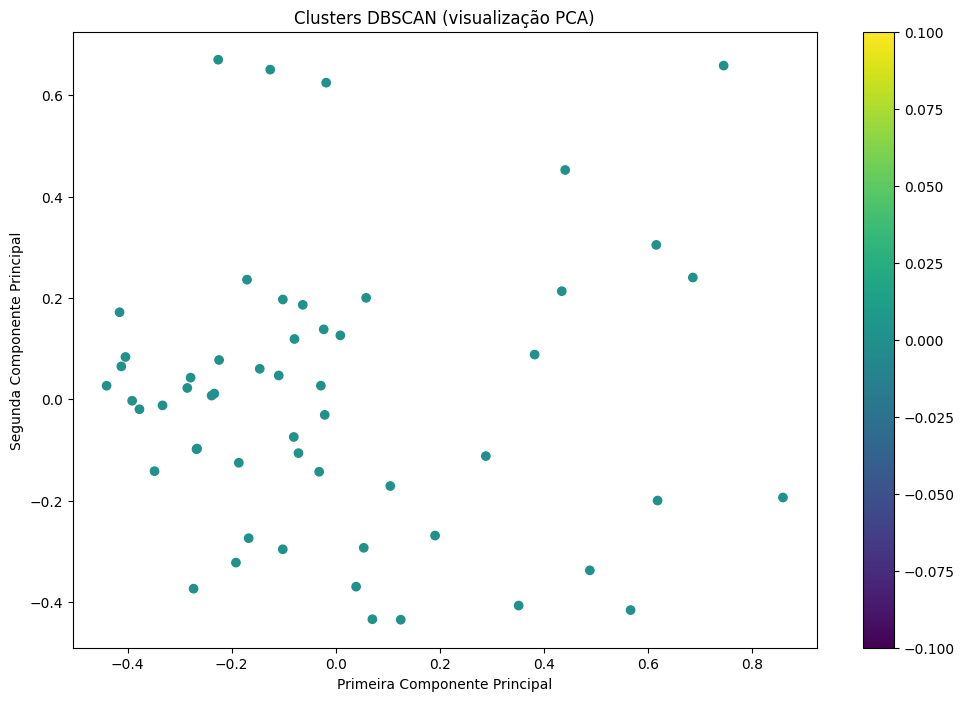

In [70]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster_dbscan'], cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('Primeira Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.title('Clusters DBSCAN (visualização PCA)')

Text(0.5, 1.0, 'Clusters kmeans (visualização PCA)')

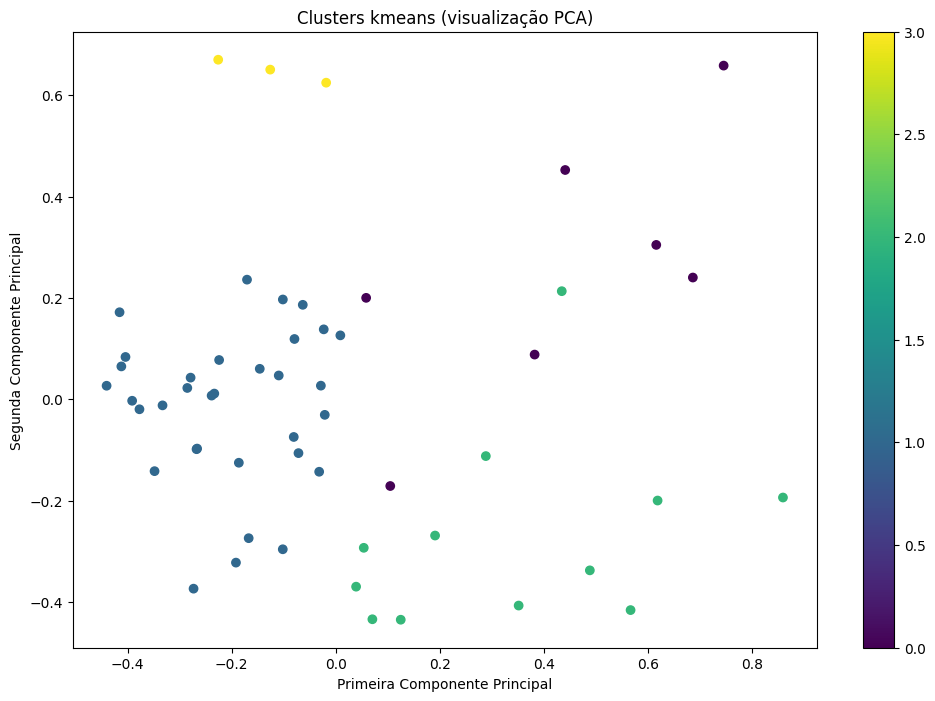

In [71]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster_kmeans'], cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('Primeira Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.title('Clusters kmeans (visualização PCA)')

# Tentando detecção de outliers.

Tentando por distância interquartílica simples para os erros de desempenho.

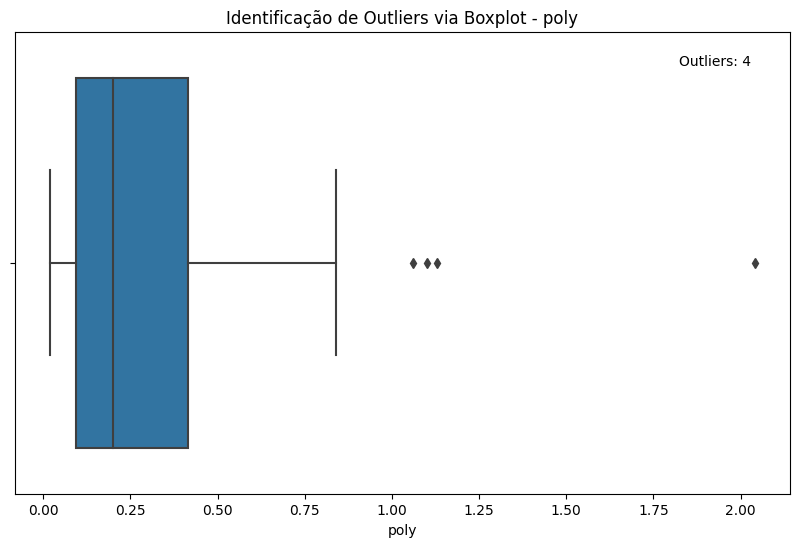


Outliers para poly:
                         Molecule  poly
10                Tricloroetileno  1.06
14                         Etanol  1.10
2                2,2-difl.propano  1.13
13  1,1-dicloroetileno/Vinilideno  2.04

Estatísticas descritivas:
count    55.000000
mean      0.330727
std       0.366145
min       0.020000
25%       0.095000
50%       0.200000
75%       0.415000
max       2.040000
Name: poly, dtype: float64

Limite inferior para outliers: -0.3849999999999999
Limite superior para outliers: 0.8949999999999999


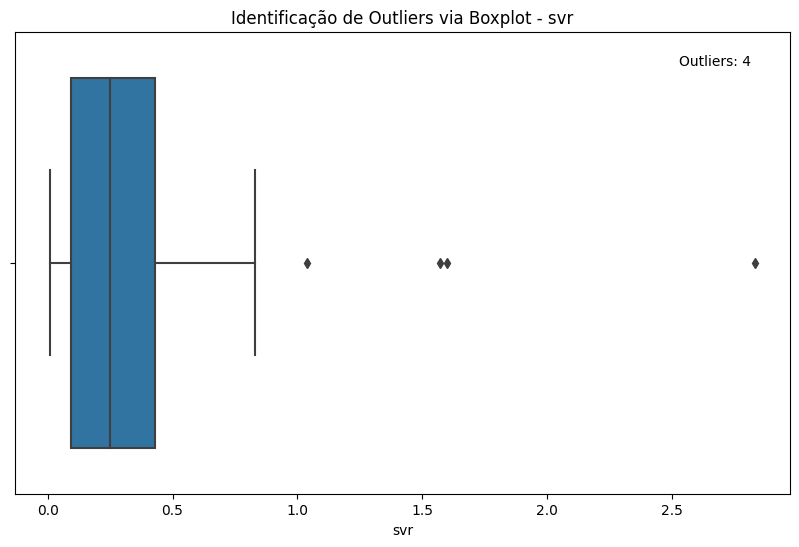


Outliers para svr:
                         Molecule   svr
2                2,2-difl.propano  1.04
0                       Isobutane  1.57
13  1,1-dicloroetileno/Vinilideno  1.60
14                         Etanol  2.83

Estatísticas descritivas:
count    55.000000
mean      0.379455
std       0.475910
min       0.010000
25%       0.095000
50%       0.250000
75%       0.430000
max       2.830000
Name: svr, dtype: float64

Limite inferior para outliers: -0.4075
Limite superior para outliers: 0.9324999999999999


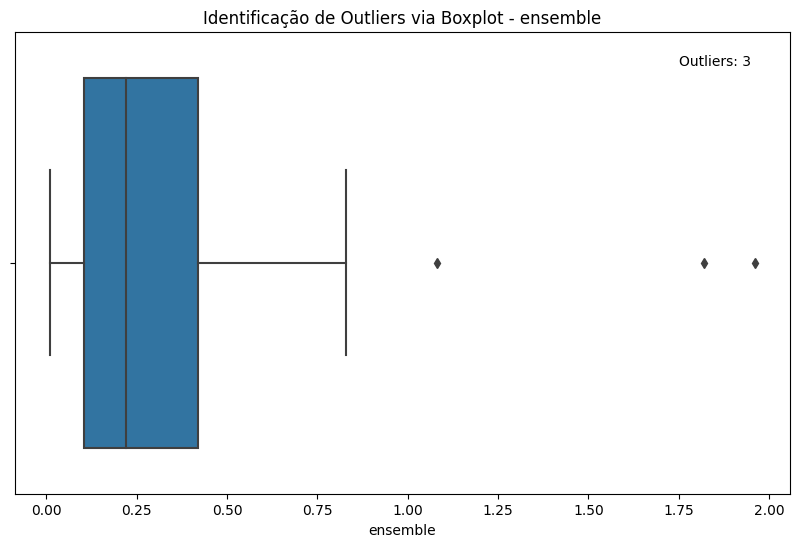


Outliers para ensemble:
                         Molecule  ensemble
2                2,2-difl.propano      1.08
13  1,1-dicloroetileno/Vinilideno      1.82
14                         Etanol      1.96

Estatísticas descritivas:
count    55.000000
mean      0.336909
std       0.386968
min       0.010000
25%       0.105000
50%       0.220000
75%       0.420000
max       1.960000
Name: ensemble, dtype: float64

Limite inferior para outliers: -0.36749999999999994
Limite superior para outliers: 0.8924999999999998


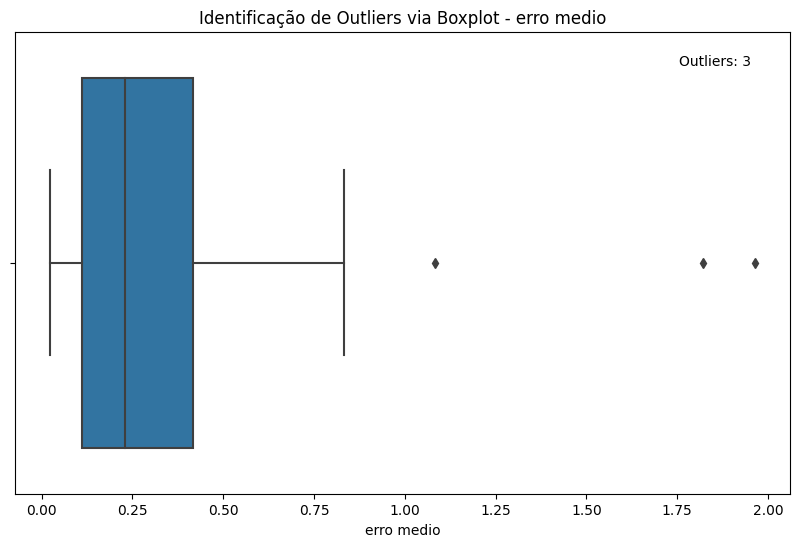


Outliers para erro medio:
                         Molecule  erro medio
2                2,2-difl.propano    1.083333
13  1,1-dicloroetileno/Vinilideno    1.820000
14                         Etanol    1.963333

Estatísticas descritivas:
count    55.000000
mean      0.349030
std       0.380881
min       0.023333
25%       0.111667
50%       0.230000
75%       0.416667
max       1.963333
Name: erro medio, dtype: float64

Limite inferior para outliers: -0.34583333333333344
Limite superior para outliers: 0.8741666666666668


In [72]:
analisar_outliers(df_performances, "poly")
analisar_outliers(df_performances, "svr")
analisar_outliers(df_performances, "ensemble")
analisar_outliers(df_performances, "erro medio")

In [73]:
identificar_gaps_significativos(df_performances, "poly")

,valor_inferior,valor_superior,tamanho_gap,indice_inferior,indice_superior
0,0.22,0.25,0.03,29,30
1,0.27,0.30,0.03,34,35
2,0.30,0.34,0.04,36,37
3,0.37,0.41,0.04,39,40
4,0.42,0.48,0.06,41,42
5,0.48,0.52,0.04,42,43
6,0.55,0.58,0.03,46,47
7,0.58,0.80,0.22,47,48
8,0.84,1.06,0.22,50,51
9,1.06,1.10,0.04,51,52


In [111]:
df_performances.sort_values("poly", ascending=False).head(7)[["Molecule", "Formula", "poly", "Expt"]]

,Molecule,Formula,poly,Expt
13,"1,1-dicloroetileno/Vinilideno",C2H2Cl2,2.04,30.0
2,"2,2-difl.propano",C3H6F2,1.13,25.0
14,Etanol,C2H6O,1.10,43.0
10,Tricloroetileno,C2HCl3,1.06,50.0
3,Dimetilcarbonato,C3H6O3,0.84,102.0
29,"1,2-cis-dicloroetileno",C2H2Cl2,0.82,66.0
20,1-fl-hexano,C6H13F,0.80,80.0


In [ ]:
df_performances[""]

Analisando os valores experimentais do positron binding da moléculas com erro abaixo de 0.8

In [89]:
df_low_80 = df_performances[df_performances["poly"] < 0.8]
df_high_80 = df_performances[df_performances["poly"] >= 0.8]
df_low_80.describe()

,poly,svr,ensemble,erro medio,Expt
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.216667,0.271875,0.224167,0.237569,134.500000
std,0.160575,0.257274,0.173743,0.165342,79.572261
min,0.020000,0.010000,0.010000,0.023333,20.000000
25%,0.077500,0.090000,0.097500,0.109167,70.000000
50%,0.175000,0.230000,0.205000,0.215000,117.500000
75%,0.300000,0.390000,0.292500,0.294167,187.000000
max,0.580000,1.570000,0.820000,0.820000,330.000000


In [106]:
len(df_low_80)

48

In [97]:
len(df_all_pol[df_all_pol["Expt"] <= 70]), len(df_all_pol)

(18, 55)

In [98]:
18/55

0.32727272727272727

In [95]:
df_high_80.describe()

,poly,svr,ensemble,erro medio,Expt
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,1.112857,1.117143,1.110000,1.113333,56.571429
std,0.432231,0.890201,0.558808,0.557295,27.784031
min,0.800000,0.010000,0.520000,0.530000,25.000000
25%,0.830000,0.755000,0.780000,0.781667,36.500000
50%,1.060000,0.830000,0.830000,0.833333,50.000000
75%,1.115000,1.320000,1.450000,1.451667,73.000000
max,2.040000,2.830000,1.960000,1.963333,102.000000


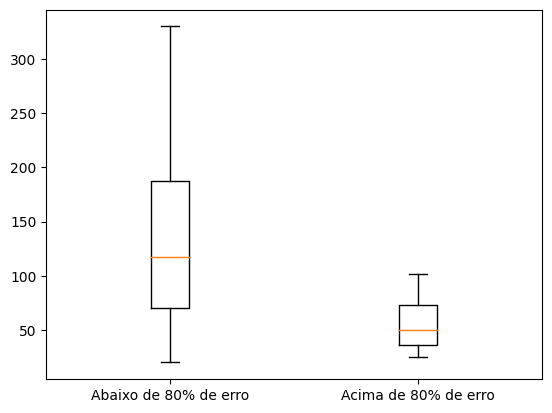

In [94]:
plt.boxplot(x=[df_low_80["Expt"], df_high_80["Expt"]], positions=[1, 2])

# Configuração dos rótulos do eixo X
plt.xticks([1, 2], ['Abaixo de 80% de erro', 'Acima de 80% de erro']);

In [79]:
identificar_gaps_significativos(df_performances, "ensemble")

,valor_inferior,valor_superior,tamanho_gap,indice_inferior,indice_superior
0,0.02,0.05,0.03,2,3
1,0.11,0.17,0.06,19,20
2,0.31,0.34,0.03,37,38
3,0.34,0.38,0.04,38,39
4,0.38,0.41,0.03,39,40
5,0.45,0.51,0.06,42,43
6,0.53,0.60,0.07,46,47
7,0.60,0.75,0.15,47,48
8,0.75,0.81,0.06,48,49
9,0.83,1.08,0.25,51,52


Acho que a técnica mais simples e fácil de ser utilizada é o cálculo de "gaps".

# Testando LOF

In [99]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor()

out_scores = lof.fit_predict(X_scaled)

In [103]:
df_all_pol["lof_label"] = out_scores

In [104]:
df_all_pol[df_all_pol["lof_label"] == -1]

,Molecule,Formula,Expt,Dipole,Alpha,pi_bond,Ei,distance,cluster_dbscan,cluster_kmeans,lof_label
8,Phenylacetylene,C8H6,230.0,0.66,13.80,5.0,8.82,8.872238,0,2,-1
14,Etanol,C2H6O,43.0,1.44,5.11,5.0,10.43,0.000000,0,2,-1
35,1-fl-nonano,C9H19F,145.0,2.20,17.00,0.0,9.60,12.947533,0,0,-1
47,Acetophenone,C8H8O,288.0,3.02,14.40,4.0,9.28,9.545837,0,0,-1
48,Benzaldehyde,C7H6O,220.0,3.14,12.80,4.0,9.50,7.993185,0,0,-1
50,Acetonitrila,C2H3N,180.0,3.90,4.40,2.0,12.20,4.323031,0,3,-1
51,Propionitrila,C3H5N,245.0,4.10,6.30,2.0,11.80,4.400977,0,3,-1
52,Pyridazine,C4H4N2,330.0,4.22,9.27,3.0,8.74,5.647132,0,0,-1
53,2-Metilpropionitrila,C4H7N,274.0,4.30,8.10,2.0,11.30,5.184265,0,3,-1
54,Benzonitrile,C7H5N,298.0,4.52,12.50,5.0,9.73,8.036697,0,0,-1


Meeehhh, não enxerguei muita coisa.